In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# disable spontaneous breathing
neo.model.models["Breathing"].breathing_enabled = False

# configure the ventilator
neo.model.models["Ventilator"].vent_mode = "PRVC"
neo.model.models["Ventilator"].pip_cmh2o_max = 20.0
neo.model.models["Ventilator"].peep_cmh2o = 3.0
neo.model.models["Ventilator"].tidal_volume = 0.015
neo.model.models["Ventilator"].vent_rate = 35.0
neo.model.models["Ventilator"].insp_flow = 8.0

# turn on the ventilator
neo.model.models["Ventilator"].switch_ventilator(True)

# configure ecls
neo.model.models["Ecls"].set_fio2(0.30)
neo.model.models["Ecls"].set_co2_flow(40.0)
neo.model.models["Ecls"].set_rpm(2500.0)

# turn on the ecls
neo.model.models["Ecls"].switch_ecls(True)


# print the model status object
for message in model.status['log']:
    print(message)

# stabilize by calculating 120 seconds
neo.fastforward(120)

 Model 'normal neonate' loaded and initialized correctly.
Ready in 7.3 sec. Average model step in 0.0304 ms.


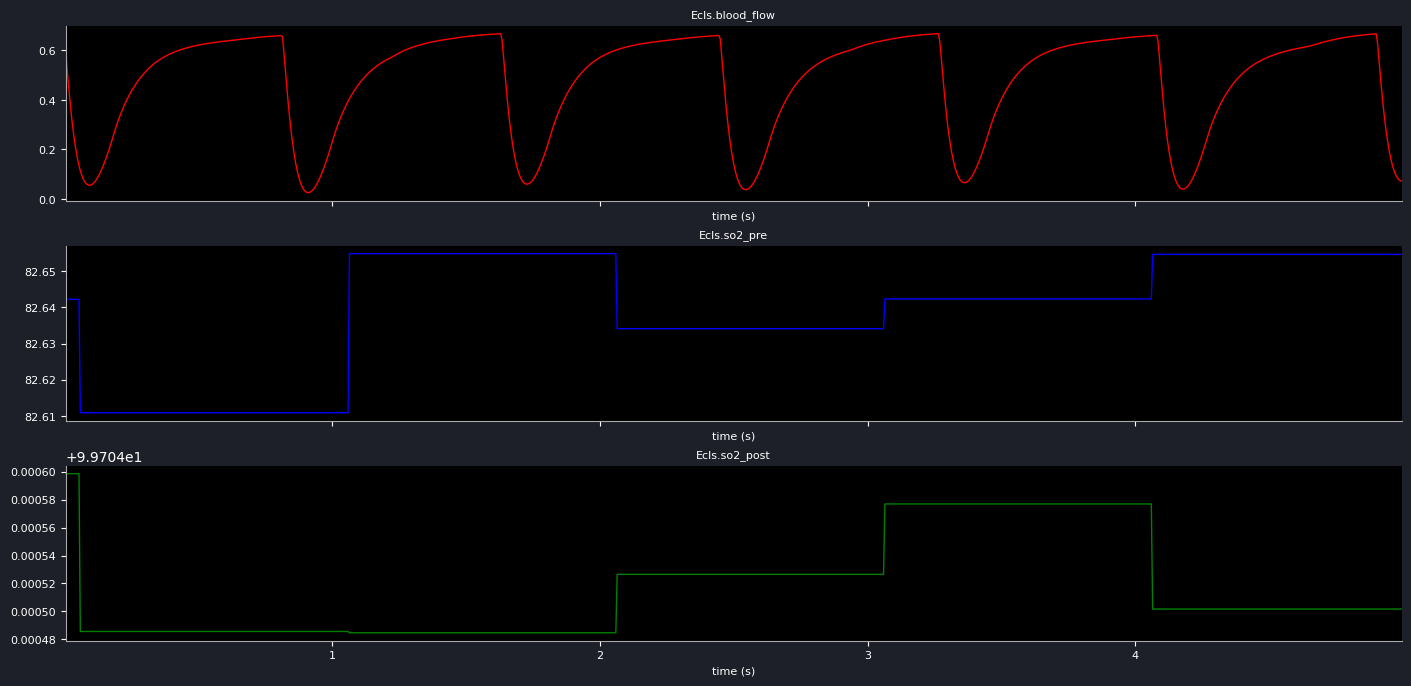


Ecls.blood_flow : max    0.66719 min    0.02561
Ecls.so2_pre    : max   82.65482 min   82.61091
Ecls.so2_post   : max    99.7046 min   99.70448


In [2]:
neo.plot_time_graph(["Ecls.blood_flow","Ecls.so2_pre","Ecls.so2_post"], sharey=False, combined=False, time_to_calculate=5, fill=False)

In [3]:
neo.get_vitals()


AA.pres         : max   71.49653, min   52.54197 mmHg
PA.pres         : max   28.66409, min   12.65878 mmHg
IVCI.pres       : max    2.89397, min    2.57913 mmHg


{'heartrate': 94.83984803671302,
 'spo2_pre': 98.78500867192864,
 'spo2_post': 99.18266744123044,
 'abp_systole': 71.49653,
 'abp_diastole': 52.54197,
 'pap_systole': 28.66409,
 'pap_diastole': 12.65878,
 'cvp': 2.684066172,
 'resp_rate': 0.0,
 'pH': 7.563526833400232,
 'po2': 108.9601337756049,
 'pco2': 28.418062127644948,
 'hco3': 25.34166052894032,
 'be': 3.679924078640072}

In [ ]:
neo.get_bloodgas("AD")

In [3]:
neo.model.models['Ecls']._oxy.aboxy

{'tco2': 26.268450115617124,
 'to2': 7.123485530247888,
 'ph': 7.563637989620508,
 'po2': 209.69976028080956,
 'pco2': 28.410313195013842,
 'hco3': 25.34123563272836,
 'be': 3.681944724048067,
 'so2': 99.70157488253365,
 'sid': 35.9,
 'albumin': 25.0,
 'phosphates': 1.64,
 'uma': 0.0,
 'dpg': 5.0,
 'hemoglobin': 8.0,
 'temp': 37.0}

In [4]:
neo.model.models['Ecls']._tubing_out.aboxy

{'tco2': 26.263783158661766,
 'to2': 7.124753704864368,
 'ph': 7.56453386243709,
 'po2': 210.6672401365839,
 'pco2': 28.347936584978335,
 'hco3': 25.337810930327258,
 'be': 3.6982301077871953,
 'so2': 99.7045017014987,
 'sid': 35.9,
 'albumin': 25.0,
 'phosphates': 1.64,
 'uma': 0.0,
 'dpg': 5.0,
 'hemoglobin': 8.0,
 'temp': 37.0}